# Ford GoBike System Data Exploration Presentation
## by Nesma Silman

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#!pip install seaborn --upgrade

## Investigation Overview

> This presentation aims to displaying the conclusion of the analysis done on Ford GoBike System Data Exploration notebook.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during 2019.

In [3]:
all_zip=[
'201901-fordgobike-tripdata.csv.zip',
'201902-fordgobike-tripdata.csv.zip',
'201903-fordgobike-tripdata.csv.zip',
'201904-fordgobike-tripdata.csv.zip',
'201905-baywheels-tripdata.csv.zip',
'201906-baywheels-tripdata.csv.zip',
'201907-baywheels-tripdata.csv.zip',
'201908-baywheels-tripdata.csv.zip',
'201909-baywheels-tripdata.csv.zip',
'201910-baywheels-tripdata.csv.zip',
'201911-baywheels-tripdata.csv.zip',
'201912-baywheels-tripdata.csv.zip']


all_files=[
'201901-fordgobike-tripdata.csv',
'201902-fordgobike-tripdata.csv',
'201903-fordgobike-tripdata.csv',
'201904-fordgobike-tripdata.csv',
'201905-baywheels-tripdata.csv',
'201906-baywheels-tripdata.csv',
'201907-baywheels-tripdata.csv',
'201908-baywheels-tripdata.csv',
'201909-baywheels-tripdata.csv',
'201910-baywheels-tripdata.csv',
'201911-baywheels-tripdata.csv',
'201912-baywheels-tripdata.csv']


We can loop over all files to merge all datasets into one large dataset

In [4]:
import zipfile

def file_open(zip_name, file_name):  
    ### Takes a zipped folder name and the name of a csv file inside the folder and returns a dataframe with the file content ###
    zf = zipfile.ZipFile(zip_name) 
    dt = pd.read_csv(zf.open(file_name))
    return dt

In [5]:
# Now we need to iterate over all files. First, let's prepare the range we will iterate over,

num=np.arange(0,12,1)
num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

But before merging all datasets, we need to select only the columns that exist in all datasets. To do this, we will iterate over the column names of all datasets, save them in a list and choose only names that existed 12 times meaning that they are common in all files.

In [6]:
colmns_lst=[]
for i in num:
    each=file_open(all_zip[i],all_files[i])
    colmns_lst.extend(each.columns)

common=[clm for clm in colmns_lst if colmns_lst.count(clm)==12]
uniq=[]
[uniq.append(cl) for cl in common if uniq.count(cl)==0]
uniq

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type']

Great ! Now we have a list of the 13 common column names. Then we can start iterating over each file, select only the common columns and concatenate all data. 

In [7]:
df=pd.concat([file_open(all_zip[i],all_files[i])[uniq] for i in num])
len(df)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2506983

In [8]:
# Now let's take a look on our large dataset,
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber


In [9]:
# Now let's check the content of our dataset,

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 13 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: float64(6), int64(2), object(5)
memory usage: 267.8+ MB


To prepare the data for analysis, it would be useful to do the below:

1) Check the missing values.

2) Remove the duplicates (If any).

3) split the date from time.

4) add a column with month name.

5) Identify the day name and number of the trip.

Let's see if we have missing data or not.

In [10]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [11]:
# Now let's delete the rows that have all values NA
df.dropna(axis=0,inplace=True, how='all')

In [12]:
# Let's now check again our NA status
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

It seems we have rows with missing values in different columns, we need to understand in which month this data exist before we drop them in order to avoid imbalancing a certain month's data. so let's iterate over the files again to check the missing values.

In [13]:
for i in num:
    data=file_open(all_zip[i],all_files[i])[uniq]
    missing=data.isna().sum().max()
    length=len(data)
    perc=np.round((missing*100/length),0)
    print('Dataset {} has {}% missing values.'.format((i+1),perc))

Dataset 1 has 0.0% missing values.
Dataset 2 has 0.0% missing values.
Dataset 3 has 0.0% missing values.
Dataset 4 has 0.0% missing values.
Dataset 5 has 0.0% missing values.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Dataset 6 has 1.0% missing values.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Dataset 7 has 22.0% missing values.
Dataset 8 has 0.0% missing values.
Dataset 9 has 0.0% missing values.
Dataset 10 has 0.0% missing values.
Dataset 11 has 1.0% missing values.
Dataset 12 has 14.0% missing values.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


So we have a challenge with datasets 7 and 12 as the volumne of missing values is large. Let's dive deeper into their details.

In [14]:
df7=file_open(all_zip[6],all_files[6])[uniq]
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258102 entries, 0 to 258101
Data columns (total 13 columns):
duration_sec               258102 non-null int64
start_time                 258102 non-null object
end_time                   258102 non-null object
start_station_id           202215 non-null float64
start_station_name         202811 non-null object
start_station_latitude     258102 non-null float64
start_station_longitude    258102 non-null float64
end_station_id             200526 non-null float64
end_station_name           201076 non-null object
end_station_latitude       258102 non-null float64
end_station_longitude      258102 non-null float64
bike_id                    258102 non-null int64
user_type                  258102 non-null object
dtypes: float64(6), int64(2), object(5)
memory usage: 25.6+ MB


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


It is obvious that the rows with some missing station data already has station latitude and longitude data, let's see if we can use the the latitude and longitude to complete the missing data.

In [15]:
df7.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
258097,850,2019-07-28 11:02:37,2019-07-28 11:16:48,NaN,NaN,37.888052,-122.256561,NaN,NaN,37.870571,-122.266337,148227,Subscriber
258098,589,2019-07-30 09:33:52,2019-07-30 09:43:41,NaN,NaN,37.888215,-122.266832,NaN,NaN,37.869662,-122.268208,547361,Subscriber
258099,370,2019-07-26 12:50:49,2019-07-26 12:56:59,NaN,NaN,37.891297,-122.279522,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,896256,Subscriber
258100,593,2019-07-30 20:26:47,2019-07-30 20:36:41,NaN,NaN,37.892187,-122.272765,NaN,NaN,37.881075,-122.270206,440004,Subscriber
258101,1716,2019-07-31 06:55:02,2019-07-31 07:23:39,NaN,NaN,37.895300,-122.269339,409.0,2100 Powell St,37.839543,-122.298718,512019,Subscriber


In [16]:
# Let's first get the rows with missing station values
missing7=df7[df7['start_station_name'].isnull()]

# and the rows with complete values
complete=df7.dropna(subset=['start_station_name'],axis=0)

len(missing7)

55291

We can join both datasets to see if the latitude & longitude  of the missing values exist in other records in the
complete dataset or not.

In [17]:
jn7=missing7.join(complete, on='start_station_latitude',lsuffix='_ms', rsuffix='_com', how='left')
jn7.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,duration_sec_ms,start_time_ms,end_time_ms,start_station_id_ms,start_station_name_ms,start_station_latitude_ms,start_station_longitude_ms,end_station_id_ms,end_station_name_ms,end_station_latitude_ms,...,start_station_id_com,start_station_name_com,start_station_latitude_com,start_station_longitude_com,end_station_id_com,end_station_name_com,end_station_latitude_com,end_station_longitude_com,bike_id_com,user_type_com
170248,710,2019-07-18 21:48:24,2019-07-18 22:00:15,NaN,NaN,37.279518,-121.872118,NaN,NaN,37.279612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170249,684,2019-07-14 12:44:35,2019-07-14 12:56:00,NaN,NaN,37.279616,-121.872123,NaN,NaN,37.270987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170250,1112,2019-07-18 20:29:54,2019-07-18 20:48:27,NaN,NaN,37.279628,-121.872113,NaN,NaN,37.279525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170251,1234,2019-07-05 02:14:01,2019-07-05 02:34:35,NaN,NaN,37.279667,-121.872135,NaN,NaN,37.279677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170252,439,2019-07-17 17:46:15,2019-07-17 17:53:35,NaN,NaN,37.280259,-121.884220,NaN,NaN,37.290978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Now let's check the joined dataframe, how many data is still missing,
jn7['start_station_name_com'].isna().sum()

55291

Mmm, it seems that the latitude of the rows with missing data is not present in the complete rows, so in this case we will have to drop the columns with missing values which are below:

start_station_id

start_station_name

end_station_id

end_station_name

Now let's move on to dataset 12

In [19]:
df12=file_open(all_zip[11],all_files[11])[uniq]
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 13 columns):
duration_sec               150102 non-null int64
start_time                 150102 non-null object
end_time                   150102 non-null object
start_station_id           129083 non-null float64
start_station_name         129087 non-null object
start_station_latitude     150102 non-null float64
start_station_longitude    150102 non-null float64
end_station_id             128755 non-null float64
end_station_name           128757 non-null object
end_station_latitude       150102 non-null float64
end_station_longitude      150102 non-null float64
bike_id                    150102 non-null int64
user_type                  150102 non-null object
dtypes: float64(6), int64(2), object(5)
memory usage: 14.9+ MB


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


The bulk missing values mainly occur in the columns we decided to exclude according to dataset 7. So let's go ahead and drop these columns from the whole dataset

In [20]:
df.drop(['start_station_id','start_station_name','end_station_id','end_station_name'], inplace= True, axis=1)
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,37.775745,-122.213037,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,37.785881,-122.408915,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,37.870139,-122.268422,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,37.770083,-122.429156,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,37.794130,-122.394430,37.787168,-122.388098,2100,Customer


In [21]:
len(df.columns)

9

Finally, Let's see the null values after dropping the bulk null columns

In [22]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

Now we don't have any missing values so we are done with the first task. Let's move on to the remaining tasks.

In [23]:
# We need to ensure there are no duplicate values,

len(df)

2506983

In [24]:
df.drop_duplicates(inplace=True)

len(df)

2506983

It seems there wasn't duplicated values. Let's now split the date & time columns.

In [25]:
def get_date(txt):
    ### Takes a text string containing date & time, returns the date only ###
    n_txt=txt.split()[0]
    return n_txt

df['st_date']=df['start_time'].apply(get_date)
df['end_date']=df['end_time'].apply(get_date)

def get_time(txt2):
    ### Takes a text string containing date & time, returns the time only ###
    tm=txt2.split()[1]
    return tm

df['st_time']=df['start_time'].apply(get_time)
df['nd_time']=df['end_time'].apply(get_time)

# then drop the old time columns

df.drop(['start_time','end_time'], inplace=True, axis=1)

df.head(1)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,st_date,end_date,st_time,nd_time
0,80825,37.775745,-122.213037,37.808894,-122.25646,4861,Subscriber,2019-01-31,2019-02-01,17:57:44.6130,16:24:49.8640


In [26]:
# Now let's extract month from the date and display it in the form of month number,

def get_month(dates):
    ### Takes a text string containing date, returns the month number ###
    mon=dates.split('-')[1]
#    month = pd.to_datetime(mon, format='%m').month_name()
    return mon
df['month']=df['end_date'].apply(get_month)
df.head(1)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,st_date,end_date,st_time,nd_time,month
0,80825,37.775745,-122.213037,37.808894,-122.25646,4861,Subscriber,2019-01-31,2019-02-01,17:57:44.6130,16:24:49.8640,02


In [27]:
def get_day(date):
    ### Takes a text string containing date, returns the day number ###
    day=date.split('-')[2]
    return day
df['day']=df['st_date'].apply(get_day)
df.head(1)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,st_date,end_date,st_time,nd_time,month,day
0,80825,37.775745,-122.213037,37.808894,-122.25646,4861,Subscriber,2019-01-31,2019-02-01,17:57:44.6130,16:24:49.8640,02,31


Finally, Let's get the name of the day of the month.

In [28]:
def get_day_name(date):
    ### Takes a text string containing date, returns the day name ###
    day=date.split('-')[2]
    day_nm = pd.to_datetime(day, format='%d').day_name()
    return day_nm
df['day_name']=df['st_date'].apply(get_day_name)
df.head(1)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,st_date,end_date,st_time,nd_time,month,day,day_name
0,80825,37.775745,-122.213037,37.808894,-122.25646,4861,Subscriber,2019-01-31,2019-02-01,17:57:44.6130,16:24:49.8640,02,31,Wednesday


Now that we completed the cleanup phase, let's start our exploration!

### What is the structure of your dataset?

> The dataset structure is tabular tidy format.

### What is/are the main feature(s) of interest in your dataset?

> ['duration_sec',
 'start_time',
 'end_time',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type']

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ['duration_sec',
    'bike_id',
 'start_time',
 'end_time',
 'user_type']

## Univariate Exploration

Now let's start exploring our data. We can start by knowing the count of rides for both user types.

In [29]:
# Let's see the # of customers vs # subscribers
df['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

The majority of rides are made by subscribers. Now let's see the # of rides along the year's months.

(Visualization 1)

The aim of this visualization is to see the # of rides along the year's months.

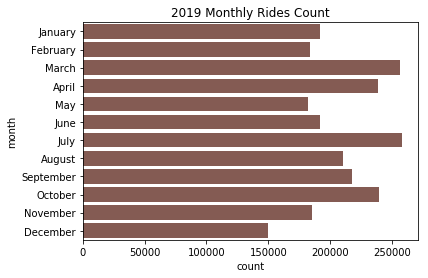

In [30]:
# Now let's plot the count of each month

base_color = sb.color_palette()[5]

# This is to display the month name to be used in label naming.
months_nam=[pd.to_datetime(x, format='%m').month_name() for x in range(1,13)]

ax=sb.countplot(data=df, y='month', color=base_color)
ax.set_title('2019 Monthly Rides Count')
ax.set_yticklabels(months_nam);

Nice! so it seems that March & July have the highest number of rides, while December is the lowest.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I investigated the count of rides on monthly basis to check the distribution all over the year. However i didn't need to perform transformations so far because the data seemed smooth and the distribution was normal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So far the data is normal with no outliers, so i didn't need to do manipulations.

## Bivariate Exploration

(Visualization 2)

Now we need to know the distribution of rides duration for both user types.

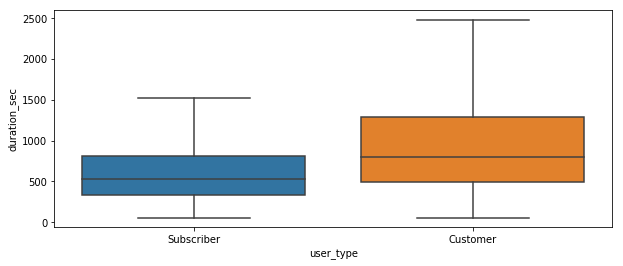

In [31]:
plt.figure(figsize = [10, 4])
ax4=sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', showfliers=False)

Although the majority of rides are made by subscribers, It seems that the variability in subscribers rides duration is less than the variability in customers rides duration.

(Visualization 3)

This visualization aims to exploring the distribution of rides duration along each month.

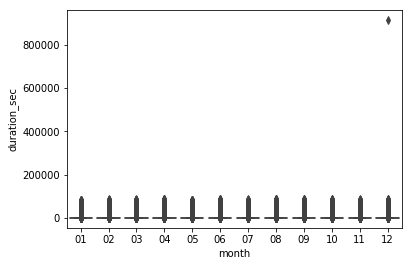

In [32]:
sb.boxplot(data = df, x = 'month', y = 'duration_sec', color = base_color)

It seems that December has an outlier that impacts the way our plot is displayed. Let's find more about it.

In [33]:
dec=df[df['month']=='12']
dec['duration_sec'].sort_values(ascending=False)[0:5]

124395    912110
28656      86230
91145      85523
11342      84819
52105      84323
Name: duration_sec, dtype: int64

So the first value is extremely high. let's exclude it from our plot.

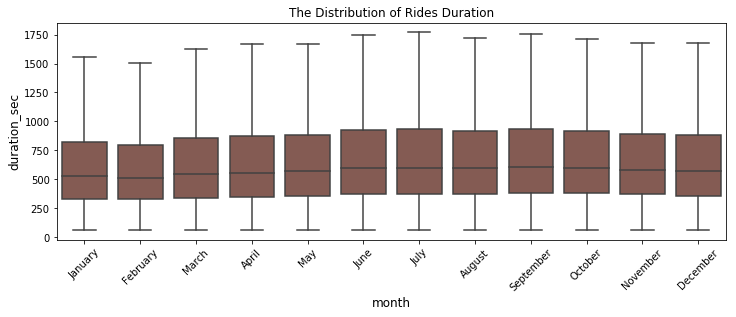

In [34]:
plt.figure(figsize = [12, 4])
plt.rcParams["axes.labelsize"] = 12
ax2=sb.boxplot(data = df, x = 'month', y = 'duration_sec', color = base_color, showfliers=False)
ax2.set_xticklabels(months_nam, rotation= 45)
ax2.set_title('The Distribution of Rides Duration');

Well the distribution seems uniform with no extremes along the months.

(Visualization 4)

Let's explore the rides count distribution after adding the user_type.

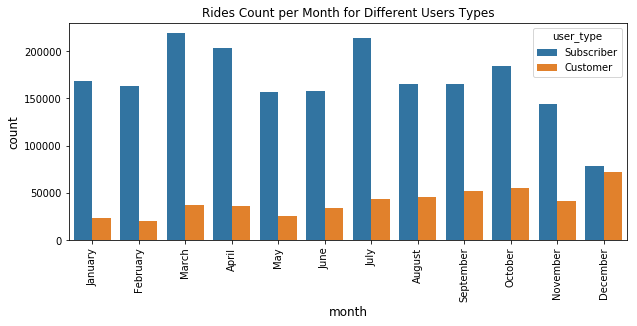

In [35]:
plt.figure(figsize = [10, 4])
ax3=sb.countplot(data = df, x = 'month', hue ='user_type')
ax3.set_xticklabels(months_nam, rotation= 90)
ax3.set_title('Rides Count per Month for Different Users Types');

It is noticed that there is a huge gap between the # of subscribers and # of customers rides along the year. However, for December the number of both subscribers and customers rides are nearly equal with a huge drop in the number of subscribers trips from previous months. I would recommend the company make promotions for subscribers to encourage them to take more trips during December in case further analyses were made for different years and the results showed similar conclusion.

(Visualization 5)

Now Let's check the count of rides trend per each day of the month.

In [36]:
# I will use the count of daily rides for each day and see the monthly trend

per_day=df.pivot_table(index='day', columns='month', aggfunc='count',dropna=True)['bike_id'].reset_index()
per_day.tail()

month,day,01,02,03,04,05,06,07,08,09,10,11,12
26,27,4984.0,7715.0,9798.0,4229.0,3139.0,7543.0,9384.0,8407.0,7768.0,3794.0,3678.0,3654.0
27,28,9417.0,9813.0,9912.0,3706.0,7057.0,7023.0,8695.0,8341.0,4719.0,8052.0,1397.0,3091.0
28,29,9539.0,NaN,10018.0,7146.0,7658.0,4218.0,11692.0,8136.0,4317.0,8694.0,1931.0,1432.0
29,30,9370.0,NaN,7010.0,7613.0,7138.0,3863.0,11990.0,6956.0,8278.0,8706.0,1075.0,4457.0
30,31,9364.0,17.0,6636.0,21.0,6924.0,13.0,9975.0,3853.0,26.0,8021.0,19.0,4297.0


It drew my attention that during February, 29 and 30 are NaN, It is expected as 2019 wasn't a leap year. Now let's melt the data to form a column with the month number.

In [37]:
mltd=pd.melt(per_day, id_vars=['day'], value_vars= list(per_day.columns)[1:]).dropna(axis=0)
mltd.head()

,day,month,value
0,01,01,2437.0
1,02,01,5820.0
2,03,01,6351.0
3,04,01,6447.0
4,05,01,2119.0


In [38]:
mltd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 371
Data columns (total 3 columns):
day      370 non-null object
month    370 non-null object
value    370 non-null float64
dtypes: float64(1), object(2)
memory usage: 11.6+ KB


Let's change the data types to 'int' to be able to plot them.

In [39]:
mltd[['day','month']]=mltd[['day','month']].astype(int)

In [40]:
mltd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 371
Data columns (total 3 columns):
day      370 non-null int64
month    370 non-null int64
value    370 non-null float64
dtypes: float64(1), int64(2)
memory usage: 11.6 KB


Good. Now let's visualize our data!

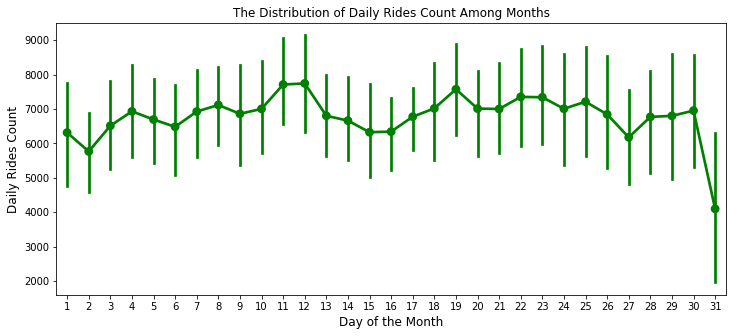

In [41]:
plt.figure(figsize = (12,5))
ax5=sb.pointplot( data=mltd, x='day', y='value',dodge = 0.3, color='green')
ax5.set_title('The Distribution of Daily Rides Count Among Months');
ax5.set_xlabel('Day of the Month')
ax5.set_ylabel('Daily Rides Count');

This plot reveals the monthly days with high volume of rides like 11 & 12, and the days with lowest # of rides like 31. However we need to put into consideration that nearly half of the months don't have a 31st day, so this explains the large variability in this day.

Another factor that we might be interested in looking at is the user type. Subscribers may be aware of the bikes and prefer to use certain ones, while customers may select any available one. Let's see if this true or not.

In [42]:
cst=(df[df['user_type']=='Customer'])
unq_cst=cst['bike_id'].nunique()

sub=(df[df['user_type']=='Subscriber'])
unq_sub=sub['bike_id'].nunique()

cust=round(unq_cst*100/len(cst),2)
uniq=round(unq_sub*100/len(sub),2)
(cust,uniq)

(2.22, 0.55)

So our assumption was true! The analysis says that for customers, the % of unique bikes is 2.2% while it is 0.5% only for subscribers. This says that subscribers tend to use certain bikes out of their experience, while customers select any available one.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My main features of interest were the rides count and rides duration. I was trying to explore the relationship between both of them and the time the rides were made in.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When i investigated the factor of user type, i found the variability in subscribers rides duration is less than the variability in customers rides duration although the share in subscribers rides count is much more than customers.


## Multivariate Exploration

(Visualization 6)

Now let's see how rides are distributed among the week days.

In [43]:
weekday=df.groupby('day_name').agg({'duration_sec':[np.mean, len]}).reset_index()
weekday

day_name duration_sec        
                     mean     len
0     Friday   800.611373  346162
1     Monday   787.526600  399983
2   Saturday   824.065631  317580
3     Sunday   813.762231  328188
4   Thursday   793.228332  346355
5    Tuesday   817.680600  392073
6  Wednesday   819.131430  376642

In [44]:
dys=np.arange(1,8,1)
dname=dict([(pd.to_datetime(d, format='%d').day_name(),d) for d in dys])

weekday['day#']=weekday['day_name'].apply(lambda x : dname[x], dname)
weekday.sort_values(by='day#',inplace=True)
weekday.columns=['day_name','duration_mean','#rides','day#']
weekday

,day_name,duration_mean,#rides,day#
1,Monday,787.526600,399983,1
5,Tuesday,817.680600,392073,2
6,Wednesday,819.131430,376642,3
4,Thursday,793.228332,346355,4
0,Friday,800.611373,346162,5
2,Saturday,824.065631,317580,6
3,Sunday,813.762231,328188,7


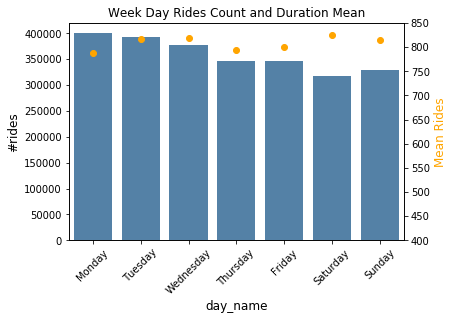

In [45]:
ds=weekday['day_name']
mean_rng=np.arange(0,1000,100)

ax7=sb.barplot(x='day_name', y='#rides',data=weekday, color='steelblue')
plt.title('Week Day Rides Count and Duration Mean')
ax7.set_xticklabels(weekday['day_name'],rotation= 45);

ax8 = ax7.twinx()
ax8.scatter(x=np.arange(0,7,1), y='duration_mean' ,data=weekday, color='Orange')
ax8.set_ylabel('Mean Rides', color='orange');
plt.ylim(400, 850);

It seems that Monday has the highest number of rides with lowest mean duration, while Saturday is the least in number of rides with highest duration. mostly due to being the weekend. This information could help the business owners know when the peak and off-peak times are in terms of both aspects (Rides count & mean) and capitalize on this to increase their profitability.

(Visualization 7)

Now i want to have a look on each bike id and see how the mean of rides duration relates to the number of rides.

In [46]:
# I will start by grouping the data by the bike_id and get the mean of rides duration and count of rides for each bike

usage=df.groupby('bike_id').agg({'duration_sec': [np.mean,len]})
usage.columns=['durations_mean','rides_count']
usage=usage.sort_values(by=['durations_mean'], ascending=False)
usage.head()

,durations_mean,rides_count
bike_id,,
6181,12219.400000,5
614329,10547.913978,93
925110,9931.000000,5
3499,7083.625000,8
239704,5900.750000,4


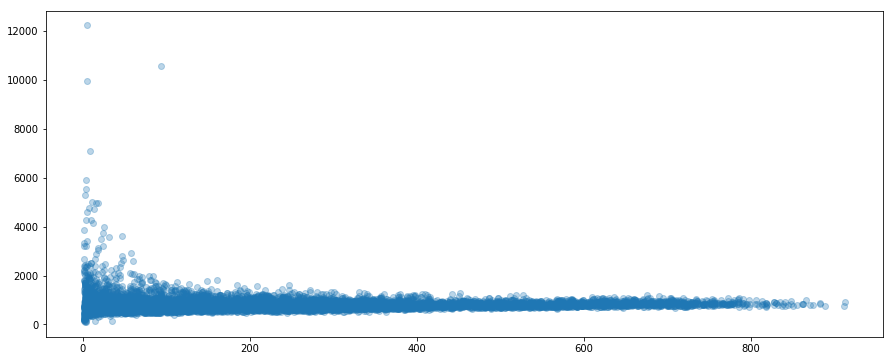

In [47]:
plt.figure(figsize = [15, 6])
plt.scatter(data=usage, x='rides_count', y='durations_mean',alpha=0.3);

There might be a negative correlation between rides duration and the number of rides. But let's exclude outliers by doing a log transformation for the y-Axis values and re-render our plot for a clearer view.

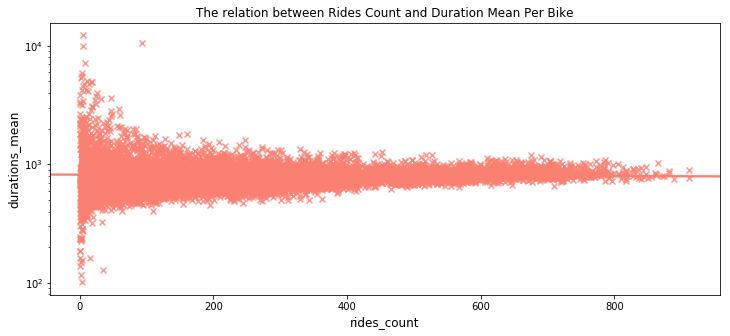

In [48]:
plt.figure(figsize = [12, 5])
ax6=sb.regplot(data=usage, x='rides_count', y='durations_mean', marker='x', color='salmon')
ax6.set_yscale('log')
plt.title('The relation between Rides Count and Duration Mean Per Bike');

The first impression one might think of is that it is normal to have more # of rides count if the mean is less because bikes have more availability for use since the rides finish quickly. But it is also strange to find that the relation is symmetric and have some bikes with both low mean duration and low number of rides. However to investigate more in this point, we would require more details about the the bikes performance and specs.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, i checked the relation between both the rides count and mean duration features and how they relate to other features like the bike ID and week day. I don't think there were features that strengthened each other.

### Were there any interesting or surprising interactions between features?

> The relation between bike ID, rides count and rides mean was surprising because i thought it would be one direction relationship, either positive or negative, however the plot showed a different view.

Thank You